<a href="https://colab.research.google.com/github/moey920/NLP/blob/master/Pre_trained_Word_Embedding_03_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)
이번엔 케라스의 임베딩 층(embedding layer)과 사전 훈련된 워드 임베딩(pre-trained word embedding)을 가져와서 사용하는 것을 비교해봅니다. 자연어 처리를 하려고 할 때 갖고 있는 훈련 데이터의 단어들을 임베딩 층(embedding layer)을 구현하여 임베딩 벡터로 학습하는 경우가 있습니다. 케라스에서는 이를 Embedding()이라는 도구를 사용하여 구현합니다.

그런데 위키피디아 등과 같은 방대한 코퍼스를 가지고 Word2vec, FastText, GloVe 등을 통해서 이미 미리 훈련된 임베딩 벡터를 불러오는 방법을 사용하는 경우도 있습니다. 이는 현재 갖고 있는 훈련 데이터를 임베딩 층으로 처음부터 학습을 하는 방법과는 대조됩니다.

# 케라스 임베딩 층(Keras Embedding layer)
케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공합니다. Embedding()은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)을 구현합니다.


## 1) 임베딩 층은 룩업 테이블이다.
임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.

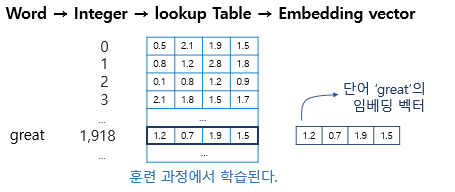



위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.

룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 케라스를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴합니다.

케라스의 임베딩 층 구현 코드를 봅시다.

In [0]:
# 아래 인자는 영수증 데이터셋을 기반으로 판단한 숫자입니다.
# v = Embedding(50000, 128, input_length=120)
# vocab_size = 20000
# output_dim = 128
# input_length = 500

임베딩 층은 다음과 같은 세 개의 인자를 받습니다.

- vocab_size : 텍스트 데이터의 전체 단어 집합의 크기입니다.
- output_dim : 워드 임베딩 후의 임베딩 벡터의 차원입니다.
- input_length : 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 됩니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴합니다. 케라스의 임베딩 층(embedding layer)을 사용하는 간단한 실습을 진행해보겠습니다.

## 2) 임베딩 층 사용하기

임베딩 층을 복습해보겠습니다. 영수증 데이터셋을 불러와서 작업해보겠습니다.

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train_file_link = '/content/drive/My Drive/text/haram_dataset.txt'

In [0]:
# 불러온 데이터를 보면 id, document, label로 구분이 되어있습니다.
train_data = pd.read_csv(train_file_link, header = 0, delimiter = '\t', quoting = 3)
train_data.head(10)

,id,document,label
0,1,ㅣ 서울특별시 마포구 월드컵로 74,2
1,2,홍인숙,16
2,3,함정한,16
3,4,사업자번호: | 629 - 35 - 00564,3
4,5,히여 매장 방문 시 해당액 해당금액 이상의 이,0
5,6,영업일자 :2020/02 /28,4
6,7,히여 매장 방문 시 해당금액 이상의 상품으로,0
7,8,히어 매장 방문 시 해당금에 이상의 상품으로,0
8,9,히어 매장 방문 시 해당금액 이상의 상품으로,0
9,10,히 이 부분교한선교회에의한 환된,0


In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 2.4MB 39.1MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [0]:
import re
import json
from konlpy.tag import Okt

from tqdm import tqdm

In [0]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거. + 영어 소문자, 대문자, 숫자도 제외
    # 일단 OCR 결과의 원형을 학습시키기 위해 정규표현식을 사용하지 않고 학습시켜보겠습니다.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s]", "",  review)
    #review_text = re.sub(" ", "",  review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [0]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', 
              '주', '등', '한', '(', ')', '/', '*', '=', 'E', '|', '-', '.', ',', 'II', 'لالالالا', 
              '|||||||||', 'iii', '|||', '. ', '.', '"', ' )', '[', ']']
okt = Okt()
clean_train_review = []

for review in tqdm(train_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

100%|██████████| 39382/39382 [00:32<00:00, 1220.25it/s]


In [0]:
sentences = clean_train_review
y_train = train_data['label']

문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [0]:
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

13494


케라스의 Tokenizer()를 사용하여 토큰화를 시켰습니다.

In [0]:
X_encoded = t.texts_to_sequences(sentences)
print(X_encoded)

[[4758, 148, 562, 2980, 43, 1064], [911, 2981], [2982], [2983, 16, 4759, 278, 4760], [663, 218, 11, 20, 4, 54, 147, 54, 8, 22], [4761, 292, 1819, 206], [663, 218, 11, 20, 4, 54, 8, 22, 5, 77], [2984, 11, 20, 4, 54, 151, 17, 22, 5, 77], [2984, 11, 20, 4, 54, 8, 22, 5, 77], [663, 26, 220, 2985, 222, 785, 179, 409], [663, 26, 220, 2985, 222, 785, 179, 409], [4762, 175, 311, 108, 35, 78, 4763], [2986, 32, 2, 86, 33, 2, 43, 93], [2987, 4, 1, 3, 99, 1, 3, 6, 70, 76, 53, 153, 173, 15], [73, 21, 23, 67, 66, 61, 13, 5, 4, 1, 1, 3, 3, 12, 12], [73, 21, 23, 5, 1, 3, 12], [73, 2256], [73, 67, 66, 61, 13, 4, 1, 3, 12], [73, 67, 66, 61, 13, 4, 1, 3, 12], [73, 67, 61, 27, 220, 4764, 335], [73, 32, 2, 86, 33, 2, 43, 93], [73, 11, 20, 4, 9], [73, 840], [177, 185, 2257, 2988], [4765, 4766], [177, 185, 2258, 664, 1192, 59, 52], [177, 185, 2259, 1820, 519, 1353, 59, 52], [4767, 435, 4768], [73, 82, 3, 6, 25, 60, 49, 46, 11, 83], [73, 82, 3, 57, 7, 6, 25, 229, 13, 73, 11, 20, 4, 9], [73, 100, 2, 22, 4, 84,

각 문장에 대해서 정수 인코딩을 수행합니다.

In [0]:
max_len=max(len(l) for l in X_encoded)
print(max_len)

45


문장 중에서 가장 길이가 긴 문장의 길이는 45입니다.

In [0]:
X_train=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(X_train)
print(y_train)

[[ 4758   148   562 ...     0     0     0]
 [  911  2981     0 ...     0     0     0]
 [ 2982     0     0 ...     0     0     0]
 ...
 [13491     0     0 ...     0     0     0]
 [13492     0     0 ...     0     0     0]
 [13493     0     0 ...     0     0     0]]
[ 2 16 16 ... 12 12 12]


In [0]:
input_data = X_train
label_data = y_train
word_index = t.word_index

In [0]:
word_index

{'교환': 1,
 '포인트': 2,
 '환불': 3,
 '시': 4,
 '상품': 5,
 '결제': 6,
 '영수증': 7,
 '금액': 8,
 '가능': 9,
 '1': 10,
 '매장': 11,
 '불가': 12,
 '차다': 13,
 '카드': 14,
 '내': 15,
 '번호': 16,
 '에': 17,
 '하다': 18,
 '품목': 19,
 '방문': 20,
 '클리어': 21,
 '이상': 22,
 '런스': 23,
 '증': 24,
 '수단': 25,
 '부분': 26,
 '지다': 27,
 '역': 28,
 '선물': 29,
 '고객': 30,
 '000': 31,
 '적립': 32,
 '가용': 33,
 '승인': 34,
 'cj': 35,
 '판매': 36,
 '가다': 37,
 '세': 38,
 '명': 39,
 '2': 40,
 '부': 41,
 '할인': 42,
 '로': 43,
 'www': 44,
 '쿠폰': 45,
 '매': 46,
 '면세': 47,
 '3': 48,
 '구': 49,
 '합계': 50,
 '제휴': 51,
 '행사': 52,
 '15일': 53,
 '해당': 54,
 '을': 55,
 '중복': 56,
 '구매': 57,
 '수량': 58,
 '매가': 59,
 '변경': 60,
 '미지': 61,
 '표시': 62,
 '미개': 63,
 '단가': 64,
 '계': 65,
 '품': 66,
 '증정': 67,
 '한해': 68,
 '과세': 69,
 '일로': 70,
 '과': 71,
 '의하다': 72,
 '후': 73,
 '용': 74,
 '일': 75,
 '부터': 76,
 '으로': 77,
 'one': 78,
 '만': 79,
 '봉': 80,
 '1577': 81,
 '단': 82,
 '에서만': 83,
 '사용': 84,
 'pos': 85,
 '익일': 86,
 '센터': 87,
 '올리브영': 88,
 '자세하다': 89,
 '신용카드': 90,
 'co': 91,
 '전표': 92,
 '전

모든 문장을 패딩하여 길이를 45로 만들어주었습니다. 훈련 데이터에 대한 전처리가 끝났습니다. 모델을 설계합니다.

In [0]:
TEST_SPLIT = 0.1
RNG_SEED = 12345
VOCAB_SIZE = len(word_index)+1
EMB_SIZE = 20
BATCH_SIZE = 12
NUM_EPOCHS = 10

인풋 데이터와 인풋 레이블을 앞서 설정한 변수값에 맞추어 훈련, 검증, 테스트 데이터로 나눠주도록 하겠습니다.

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

input_train, input_test, label_train, label_test = train_test_split(input_data, label_data, test_size=TEST_SPLIT, random_state=RNG_SEED)
#10%의 데이터를 테스트 데이터로 활용하도록 하겠습니다.

훈련(90%), 테스트(10%)를 나눴으니 훈련 데이터에서 일정량을 떼어 검증 데이터로 사용하겠습니다.

In [0]:
input_val = input_train[30000:]
label_val = label_train[30000:]
input_train = input_train[:30000]
label_train = label_train[:30000]

In [0]:
print(len(input_train),len(label_train),': 훈련용 데이터/라벨','\n',len(input_val),len(label_val),': 검증용 데이터/라벨','\n',len(input_test),len(label_test),': 테스트용 데이터/라벨')

30000 30000 : 훈련용 데이터/라벨 
 5443 5443 : 검증용 데이터/라벨 
 3939 3939 : 테스트용 데이터/라벨


In [0]:
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [0]:
# 데이터셋 전처리 : 문장 길이 맞추기
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_val = sequence.pad_sequences(input_val, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

#ndarray with shape(16000,120) : input_train
#ndarray with shape(2000,120) : input_val
#ndarray with shape(2000,120) : input_test

In [0]:
# one-hot 인코딩
label_train = np_utils.to_categorical(label_train)
label_val = np_utils.to_categorical(label_val)
label_test = np_utils.to_categorical(label_test)

#ndarray with shape(16000, ) : label_train

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras import backend as K

In [0]:
# 특정 클래스에 대한 정밀도
def single_class_precision(interesting_class_id):
    def prec(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1) # y_true: 실제 값, 티아노 및 텐스플로우의 텐서(tensor)
        class_id_pred = K.argmax(y_pred, axis=-1) # y_pred: 예측 값, 티아노 및 텐스플로우의 텐서(tensor)
        precision_mask = K.cast(K.equal(class_id_pred, interesting_class_id), 'int32')
        class_prec_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * precision_mask
        class_prec = K.cast(K.sum(class_prec_tensor), 'float32') / K.cast(K.maximum(K.sum(precision_mask), 1), 'float32')
        return class_prec
    return prec

In [0]:
# 특정 클래스에 대한 재현율
def single_class_recall(interesting_class_id):
    def recall(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_pred = K.argmax(y_pred, axis=-1)
        recall_mask = K.cast(K.equal(class_id_true, interesting_class_id), 'int32')
        class_recall_tensor = K.cast(K.equal(class_id_true, class_id_pred), 'int32') * recall_mask
        class_recall = K.cast(K.sum(class_recall_tensor), 'float32') / K.cast(K.maximum(K.sum(recall_mask), 1), 'float32')
        return class_recall
    return recall

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len)) # 모든 임베딩 벡터는 4차원.
#model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 45, 128)           1727232   
_________________________________________________________________
dropout_9 (Dropout)          (None, 45, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 43, 256)           98560     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)               

출력층에 20개의 뉴런에 활성화 함수로는 categorical_crossentropy 함수를 사용하여 다중 분류를 수행합니다.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy',
                       single_class_precision(0), single_class_recall(0),
                       single_class_precision(1), single_class_recall(1),
                       single_class_precision(2), single_class_recall(2),
                       single_class_precision(3), single_class_recall(3),
                       single_class_precision(4), single_class_recall(4),
                       single_class_precision(5), single_class_recall(5),
                       single_class_precision(6), single_class_recall(6),
                       single_class_precision(7), single_class_recall(7),
                       single_class_precision(8), single_class_recall(8),
                       single_class_precision(9), single_class_recall(9),
                       single_class_precision(10), single_class_recall(10),
                       single_class_precision(11), single_class_recall(11),
                       single_class_precision(12), single_class_recall(12),
                       single_class_precision(13), single_class_recall(13),
                       single_class_precision(14), single_class_recall(14),
                       single_class_precision(15), single_class_recall(15),
                       single_class_precision(16), single_class_recall(16),
                       single_class_precision(17), single_class_recall(17),
                       single_class_precision(18), single_class_recall(18),
                       single_class_precision(19), single_class_recall(19)])

In [0]:
model.fit(input_train, label_train, epochs=15, verbose=1, validation_data=(input_val, label_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30000 samples, validate on 5443 samples
Epoch 1/15





30000/30000 [==============================] - 46s 2ms/step - loss: 0.6171 - acc: 0.8249 - prec: 0.8368 - recall: 0.9746 - prec_1: 0.3202 - recall_1: 0.3162 - prec_2: 0.3268 - recall_2: 0.3244 - prec_3: 0.2032 - recall_3: 0.1884 - prec_4: 0.2288 - recall_4: 0.2244 - prec_5: 0.5779 - recall_5: 0.5807 - prec_6: 0.1776 - recall_6: 0.2151 - prec_7: 0.3472 - recall_7: 0.3460 - prec_8: 0.3056 - recall_8: 0.3031 - prec_9: 0.3035 - recall_9: 0.3040 - prec_10: 0.3150 - recall_10: 0.3161 - prec_11: 0.3389 - recall_11: 0.3399 - prec_12: 0.0021 - recall_12: 8.8889e-04 - prec_13: 0.3845 - recall_13: 0.3783 - prec_14: 0.0277 - recall_14: 0.0267 - prec_15: 0.1993 - recall_15: 0.1910 - prec_16: 0.2261 - recall_16: 0.1998 - prec_17: 0.3024 - recall_17: 0.2910 - prec_18: 0.5949 - recall_18: 0.5981 - prec_19: 0.1614 - recall_19: 0.1559 - val_los

3939/3939 [==============================] - 1s 167us/step
## evaluation loss and_metrics ##
[0.37981544088124924, 0.921807564554798, 0.9089601188935916, 0.981906302267599, 1.0, 1.0, 0.9633780230299172, 0.9003475264838335, 0.9669886422235974, 0.8264090981420511, 0.9436743669202406, 0.9313982740577994, 0.9779660994100462, 0.9909875581457579, 0.9918761106879919, 0.34631136571220045, 1.0, 1.0, 0.9238441789867491, 0.9711432718298525, 0.9546295296543593, 0.959767403836237, 1.0, 0.9855575309728238, 0.959767403836237, 0.9632748567262075, 0.39341626599465085, 0.06391556464905483, 0.9927787616126397, 1.0, 0.4800710840314801, 0.5450621985275451, 0.6760760479452768, 0.9404248065469107, 0.9054159204437515, 0.6407855455116985, 1.0, 0.9337709595873199, 0.9557319833984772, 0.9820992018886555, 0.8915768710754038, 1.0]


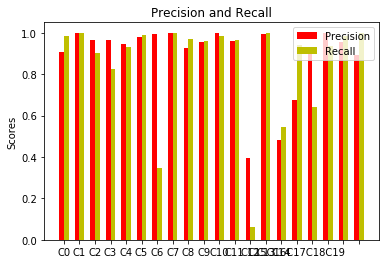

In [0]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(input_test, label_test, batch_size=256)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

import numpy as np

metrics = np.array(loss_and_metrics[2:42])
idx = np.linspace(0, 39, num=40) 
precision = metrics[(idx % 2) == 0]
recall = metrics[((idx+1) % 2) == 0]

import matplotlib.pyplot as plt

N = 20
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots()
prec_bar = ax.bar(ind, precision, width, color='r')
recall_bar = ax.bar(ind + width, recall, width, color='y')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15' 'C16' 'C17' 'C18' 'C19'))

ax.legend((prec_bar[0], recall_bar[0]), ('Precision', 'Recall'))

plt.show()

In [0]:
print("loss : ", loss_and_metrics[0])
print("acc : ", loss_and_metrics[1],'\n')
print("불필요정보 정밀도 : ", loss_and_metrics[2])
print("불필요정보 재현율 : ", loss_and_metrics[3],'\n')
print("브랜드 정밀도 : ", loss_and_metrics[4])
print("브랜드 재현율 : ", loss_and_metrics[5],'\n')
print("주소 정밀도 : ", loss_and_metrics[6])
print("주소 재현율 : ", loss_and_metrics[7],'\n')
print("사업자등록번호 정밀도 : ", loss_and_metrics[8])
print("사업자등록번호 재현율 : ", loss_and_metrics[9],'\n')
print("구매일시 정밀도 : ", loss_and_metrics[10])
print("구매일시 재현율 : ", loss_and_metrics[11],'\n')
print("상품명 정밀도 : ", loss_and_metrics[12])
print("상품명 재현율 : ", loss_and_metrics[13],'\n')
print("상품바코드 정밀도 : ", loss_and_metrics[14])
print("상품바코드 재현율 : ", loss_and_metrics[15],'\n')
print("결제금액 정밀도 : ", loss_and_metrics[16])
print("결제금액 재현율 : ", loss_and_metrics[17],'\n')
print("카드금액 정밀도 : ", loss_and_metrics[18])
print("카드금액 재현율 : ", loss_and_metrics[19],'\n')
print("카드번호 정밀도 : ", loss_and_metrics[20])
print("카드번호 재현율 : ", loss_and_metrics[21],'\n')
print("카드사명 정밀도 : ", loss_and_metrics[22])
print("카드사명 재현율 : ", loss_and_metrics[23],'\n')
print("카드승인번호 정밀도 : ", loss_and_metrics[24])
print("카드승인번호 재현율 : ", loss_and_metrics[25],'\n')
print("영수증 바코드 정밀도 : ", loss_and_metrics[26])
print("영수증 바코드 재현율 : ", loss_and_metrics[27],'\n')
print("결제방법 정밀도 : ", loss_and_metrics[28])
print("결제방법 재현율 : ", loss_and_metrics[29],'\n')
print("현금영수증 승인번호 정밀도 : ", loss_and_metrics[30])
print("현금영수증 승인번호 재현율 : ", loss_and_metrics[31],'\n')
print("지점명 정밀도 : ", loss_and_metrics[32])
print("지점명 재현율 : ", loss_and_metrics[33],'\n')
print("대표자명 정밀도 : ", loss_and_metrics[34])
print("대표자명 재현율 : ", loss_and_metrics[35],'\n')
print("전화번호 정밀도 : ", loss_and_metrics[36])
print("전화번호 재현율 : ", loss_and_metrics[37],'\n')
print("단가 및 금액 정밀도 : ", loss_and_metrics[38])
print("단가 및 금액 재현율 : ", loss_and_metrics[39],'\n')
print("수량 정밀도 : ", loss_and_metrics[40])
print("수량 재현율 : ", loss_and_metrics[41])

loss :  0.37981544088124924
acc :  0.921807564554798 

불필요정보 정밀도 :  0.9089601188935916
불필요정보 재현율 :  0.981906302267599 

브랜드 정밀도 :  1.0
브랜드 재현율 :  1.0 

주소 정밀도 :  0.9633780230299172
주소 재현율 :  0.9003475264838335 

사업자등록번호 정밀도 :  0.9669886422235974
사업자등록번호 재현율 :  0.8264090981420511 

구매일시 정밀도 :  0.9436743669202406
구매일시 재현율 :  0.9313982740577994 

상품명 정밀도 :  0.9779660994100462
상품명 재현율 :  0.9909875581457579 

상품바코드 정밀도 :  0.9918761106879919
상품바코드 재현율 :  0.34631136571220045 

결제금액 정밀도 :  1.0
결제금액 재현율 :  1.0 

카드금액 정밀도 :  0.9238441789867491
카드금액 재현율 :  0.9711432718298525 

카드번호 정밀도 :  0.9546295296543593
카드번호 재현율 :  0.959767403836237 

카드사명 정밀도 :  1.0
카드사명 재현율 :  0.9855575309728238 

카드승인번호 정밀도 :  0.959767403836237
카드승인번호 재현율 :  0.9632748567262075 

영수증 바코드 정밀도 :  0.39341626599465085
영수증 바코드 재현율 :  0.06391556464905483 

결제방법 정밀도 :  0.9927787616126397
결제방법 재현율 :  1.0 

현금영수증 승인번호 정밀도 :  0.4800710840314801
현금영수증 승인번호 재현율 :  0.5450621985275451 

지점명 정밀도 :  0.6760760479452768
지점명 재현율 :  0.94042480

테스트 데이터에 대한 정확도가 아니며 훈련 데이터도 양이 적어서 정확도에 의미는 없지만, 여기서 말하고자 하는 점은 현재 각 단어들의 임베딩 벡터들의 값은 학습 과정에서 다른 가중치들과 함께 학습된 값입니다.

+ 테스트 시 배치 사이즈를 512까지 늘렸더니 재현율과 정밀도가 평균적으로 90% 넘습니다. 제 생각엔 믿을 수 없는 결과입니다. 
일반적으로 배치사이즈가 1이면 문제가 100개일 때 한문제를 풀고 답을 맞추고, 가중치를 갱신하고 다음 문제를 풀겠다는 의미입니다. 따라서 
배치사이즈가 작을수록 가중치 갱신이 자주 일어납니다.
03.17 model.fit()의 배치사이즈부터 1, 128, 512 순으로 조정하여 실험해보겠습니다.

In [0]:
model.save('Text_multi_classfication_with_CNN_haram.h5')

In [0]:
from keras.models import load_model
model = load_model('Text_multi_classfication_with_CNN_haram.h5')

In [0]:
model.summary()

# 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

임베딩 벡터를 얻기 위해서 케라스의 Embedding()을 사용하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 불러서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 모델에 케라스의 Embedding()을 사용하는 것보다 다른 텍스트 데이터로 사전 훈련되어 있는 임베딩 벡터를 불러오는 것이 나은 선택일 수 있습니다.

훈련 데이터가 적다면 케라스의 Embedding()으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않습니다. 차라리 해당 문제에 특화된 임베딩 벡터를 만드는 것이 어렵다면, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

사전 훈련된 GloVe와 Word2Vec 임베딩을 사용해서 모델을 훈련시키는 실습을 진행해봅시다.

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip

Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

훈련 데이터는 앞서 사용했던 데이터에 동일한 전처리가 수행된 상태라고 가정하겠습니다.

In [0]:
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [0]:
print(y_train)

[1 0 0 1 1 0 1]


## 1) 사전 훈련된 GloVe 사용하기

이제 임베딩 층을 설계하기 위한 과정부터 달라집니다. 우선 다운로드 받은 파일인 glove.6B.zip의 압축을 풀면 그 안에 4개의 파일이 있는데 여기서 사용할 파일은 glove.6B.100d.txt 파일입니다. 해당 파일은 하나의 줄당 101개의 값을 가지는 리스트를 갖고 있습니다. 두 개의 줄만 읽어보도록 하겠습니다.

### [꿀팁]Colab에서 구글 드라이브 마운트를 통해 파일 가져오기
Colab에서 구글 드라이브 API를 통해 굳이 연결하지 않더라도,
Colab 왼쪽 상단을 보면 폴더 모양의 아이콘이 있습니다. 이를 클릭하고
드라이브 마운트를 통해 계정에 연결해놓으면 개인 구글 드라이브에 있는 폴더들이 나타납니다.
이 중 content/drive/Mydrive/ 로 들어가면 자신의 구글 드라이브에 있는 폴더와 파일들이 나타납니다.
사용하고자 하는 파일을 우클릭하고 경로를 복사하면
f = open('복사한 경로 붙여넣기')를 통해
간편하게 사용할 수 있습니다.

In [0]:
n=0
f = open('/content/drive/My Drive/text/data.txt', encoding="utf8")

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['CI올리브영(', ')', '이정', '부대로', '|||||||||']
CI올리브영(
['경기도', '의정부시', '평화로', '552', '|', ':031-', '856', '-', '5290']
경기도


In [0]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
9


101개의 값 중에서 첫번째 값은 임베딩 벡터가 의미하는 단어를 의미하며, 
두번째 값부터 마지막 값은 해당 단어의 임베딩 벡터의 100개의 차원에서의 각 값을 의미합니다. 

즉, glove.6B.100d.txt는 수많은 단어에 대해서 100개의 차원을 가지는 임베딩 벡터로 제공하고 있습니다. 

위의 출력 결과는 단어 'the'에 대해서 100개의 차원을 가지는 임베딩 벡터와 단어 ','에 대해서 100개의 차원을 가지는 임베딩 벡터를 보여줍니다. 

그러면 이제 glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 불러와보겠습니다. 

형식은 키(key)와 값(value)의 쌍(pair)를 가지는 파이썬의 사전형 구조를 사용합니다.

In [0]:
import numpy as np
embedding_dict = dict()
f = open('/content/drive/My Drive/text/data.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

ValueError: ignored

### 오류 발생 : 전처리 되지 않은 텍스트에 대한 문제
위의 코드에서 
ValueError: could not convert string to float: ')'
에러가 발생합니다.

이유는 data.txt에 들어있는 텍스트는 전혀 전처리를 거치지 않은 상태이기 때문에 array로 리턴하고자 할 때 ')'이 문제가 되기 때문입니다.

해당 문자만 불용어로 처리하고 다음으로 넘어가는 것은 의미가 없기 때문에 전체 데이터에 대해 전처리를 수행한 후에 사전 훈련된 워드 임베딩을 다시 도전해보겠습니다.


# 전처리 후 재도전